In [2]:
import torch
checkpoint = torch.load("./logging/autoencoder.ckpt")

In [33]:
from model.autoencoder_conv import AutoEncoderConv
model = AutoEncoderConv()

model.load_from_checkpoint("./logging/saved_checkpoint/autoencoder_Conv.ckpt")

Lightning automatically upgraded your loaded checkpoint from v1.9.3 to v2.0.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\mhzar\Desktop\Spring 2023\ME 592\HW3\part2\logging\saved_checkpoint\autoencoder_Conv.ckpt`


AutoEncoderConv(
  (encoder): EncoderConv(
    (conv): Sequential(
      (0): Conv2d(1, 16, kernel_size=(5, 3), stride=(2, 2), padding=(1, 1))
      (1): GELU(approximate=none)
      (2): Conv2d(16, 32, kernel_size=(5, 3), stride=(2, 2), padding=(1, 1))
      (3): GELU(approximate=none)
      (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (5): GELU(approximate=none)
    )
    (fc1): Linear(in_features=12896, out_features=1024, bias=True)
  )
  (decoder): DecoderConv(
    (linear): Sequential(
      (0): Linear(in_features=1024, out_features=12896, bias=True)
      (1): GELU(approximate=none)
    )
    (net): Sequential(
      (0): ConvTranspose2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
      (1): GELU(approximate=none)
      (2): ConvTranspose2d(32, 16, kernel_size=(5, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 0))
      (3): GELU(approximate=none)
      (4): ConvTranspose2d(16, 1, kernel_size=(5, 3), st

In [39]:
from utils.data_loading import CombustionSystemDataset
import matplotlib.pyplot as plt
import numpy as np

PATH = 'Zare_data/combustion_img_13.mat'

test_data = CombustionSystemDataset(PATH, 'test_set_x', 'test_set_y')
index = 200
raw_image = test_data.data[index]
label = test_data.labels[index]

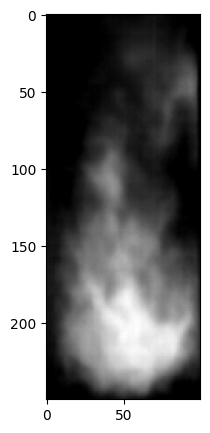

In [42]:
test_image = np.resize(raw_image,(250,100))
plt.figure(figsize=(20,5))
plt.imshow(test_image, cmap='gray')
plt.show()

In [43]:
output = model(torch.reshape(torch.tensor(raw_image),(1,1,250,100)))

C:\Users\mhzar\AppData\Local\Temp\ipykernel_26044\2904784740.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output = model(torch.reshape(torch.tensor(raw_image),(1,1,250,100)))


In [44]:
np.shape(output)

torch.Size([1, 1, 250, 100])

In [45]:
image_numpy = output.detach().numpy()

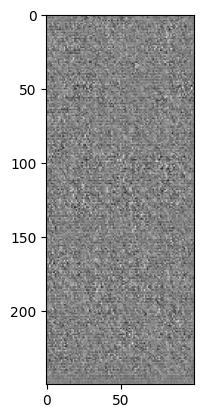

In [46]:
# Rearrange the dimensions to HxWxC
image = image_numpy[0,0,:,:]
# Display the image
plt.imshow(image,cmap='gray')
plt.show()